#install https://anaconda.org/conda-forge/ttach

In [1]:
#pip install ttach

In [2]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
#from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50, ResNet50_Weights
import numpy as np
import torch
import matplotlib.pyplot as plt
import skimage

In [3]:
model = resnet50(weights=ResNet50_Weights.DEFAULT)
model.eval()
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [4]:
#choose the target layer(s)
target_layers = [model.layer4[-1]]

(224, 224, 3)


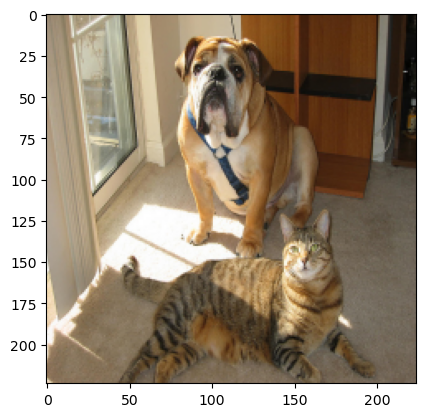

In [5]:
#load a single rgb image from harddrive
image=skimage.io.imread("examples/both.png")
image=image.astype("float32")
image=image/image.max()
image.shape
print(image.shape)
plt.imshow(image)

In [6]:
#if the image is gray-scale, then convert it to rgb
#image_gray=np.random.rand(224,224)
#image_gray.shape (224,224)
#image_gray=image_gray.reshape(224,224,1)
#image_color=np.concatenate([image_gray, image_gray, image_gray], axis=2)
#print(image_color.shape)
#plt.imshow(image_color)

In [7]:
#convert numpy array to pytorch tensor
image_input=torch.tensor(image).permute(2,0,1) # (224,224,3) to (3,224,224)
image_input=image_input.reshape(1,3,224,224)# a batch that only has one image
image_input.shape

torch.Size([1, 3, 224, 224])

In [8]:
class ClassifierOutputTarget:
    def __init__(self, category):
        self.category = category

    def __call__(self, model_output):
        if len(model_output.shape) == 1:
            return model_output[self.category]
        return model_output[:, self.category]

In [9]:
model_output=model(image_input)
model_output.shape

torch.Size([1, 1000])

In [10]:
# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=False)

# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...

# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.

# https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/
#category 281 is tabby, tabby cat

targets = [ClassifierOutputTarget(category=281)]

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
# pay attention to the shape of each input
grayscale_cam = cam(input_tensor=image_input, targets=targets)
grayscale_cam.shape

(1, 224, 224)

In [11]:
grayscale_cam=grayscale_cam[0]
grayscale_cam.shape

(224, 224)

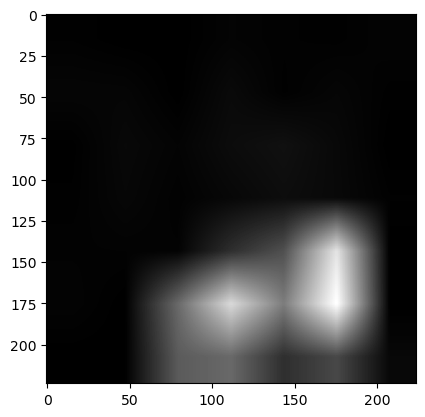

In [12]:
plt.imshow(grayscale_cam, cmap='gray')

In [13]:
# In this example grayscale_cam has only one image in the batch:
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)

In [14]:
cam_image.shape

(224, 224, 3)

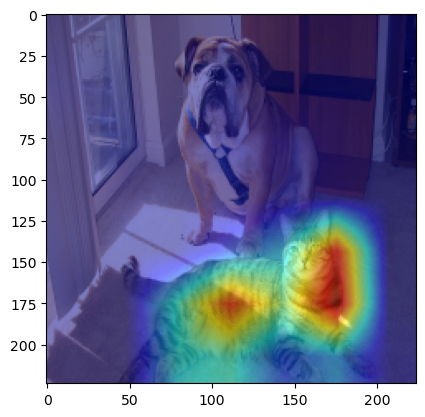

In [15]:
plt.imshow(cam_image)

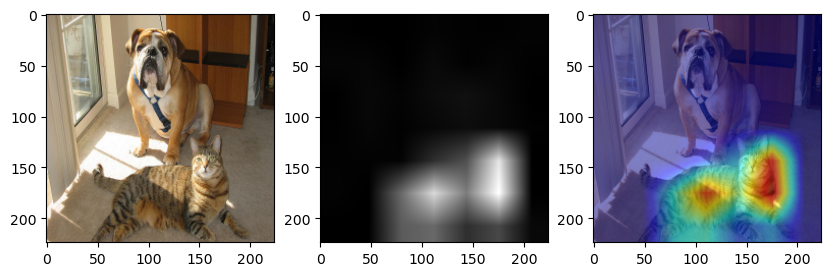

In [16]:
#GradCAM
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=False)
targets = [ClassifierOutputTarget(category=281)]
grayscale_cam = cam(input_tensor=image_input, targets=targets)
grayscale_cam=grayscale_cam[0]
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(grayscale_cam, cmap='gray')
ax[2].imshow(cam_image)

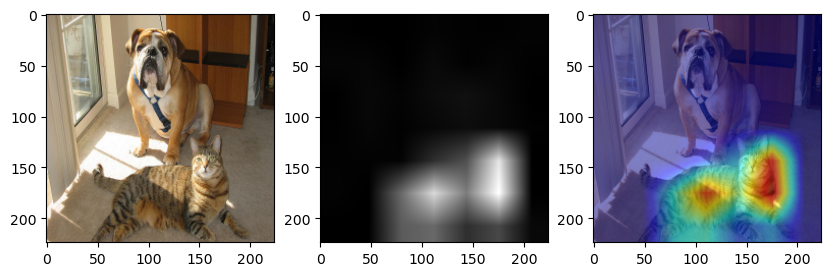

In [17]:
#HiResCAM
cam = HiResCAM(model=model, target_layers=target_layers, use_cuda=False)
targets = [ClassifierOutputTarget(category=281)]
grayscale_cam = cam(input_tensor=image_input, targets=targets)
grayscale_cam=grayscale_cam[0]
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(grayscale_cam, cmap='gray')
ax[2].imshow(cam_image)

100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [01:00<00:00,  2.13it/s]
C:\Teaching\ML2023\GradCam\pytorch_grad_cam\utils\image.py:48: RuntimeWarning: invalid value encountered in cast
  heatmap = cv2.applyColorMap(np.uint8(255 * mask), colormap)


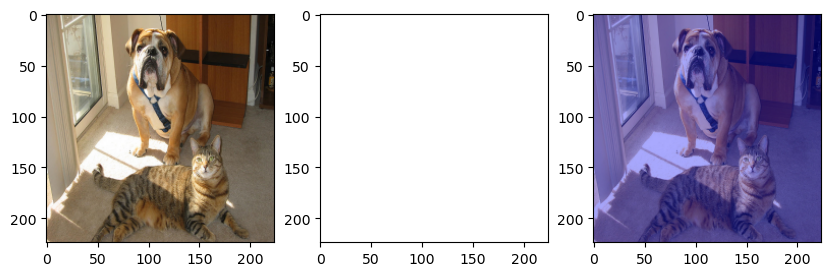

In [18]:
#ScoreCAM
cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=False)
targets = [ClassifierOutputTarget(category=281)]
grayscale_cam = cam(input_tensor=image_input, targets=targets)
grayscale_cam=grayscale_cam[0]
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(grayscale_cam, cmap='gray')
ax[2].imshow(cam_image)

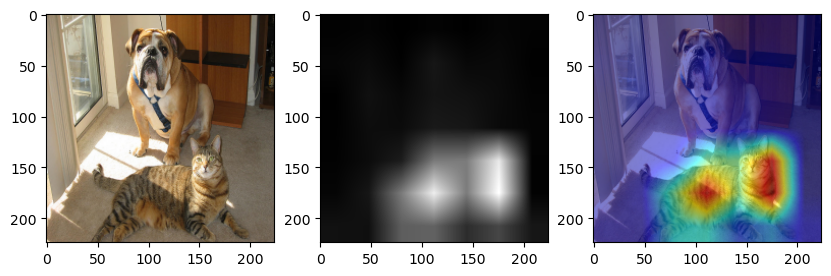

In [19]:
#GradCAMPlusPlus
cam = GradCAMPlusPlus(model=model, target_layers=target_layers, use_cuda=False)
targets = [ClassifierOutputTarget(category=281)]
grayscale_cam = cam(input_tensor=image_input, targets=targets)
grayscale_cam=grayscale_cam[0]
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(grayscale_cam, cmap='gray')
ax[2].imshow(cam_image)

100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [01:01<00:00,  1.04it/s]


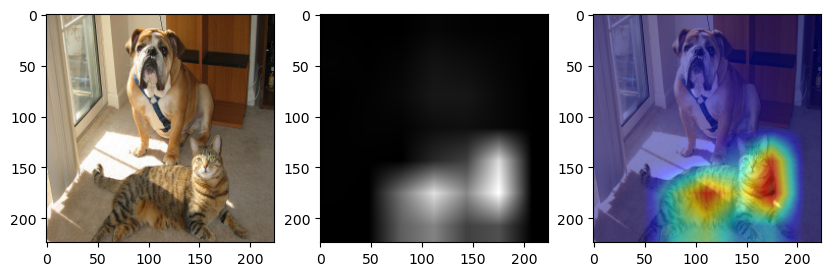

In [20]:
#AblationCAM
cam = AblationCAM(model=model, target_layers=target_layers, use_cuda=False)
targets = [ClassifierOutputTarget(category=281)]
grayscale_cam = cam(input_tensor=image_input, targets=targets)
grayscale_cam=grayscale_cam[0]
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(grayscale_cam, cmap='gray')
ax[2].imshow(cam_image)

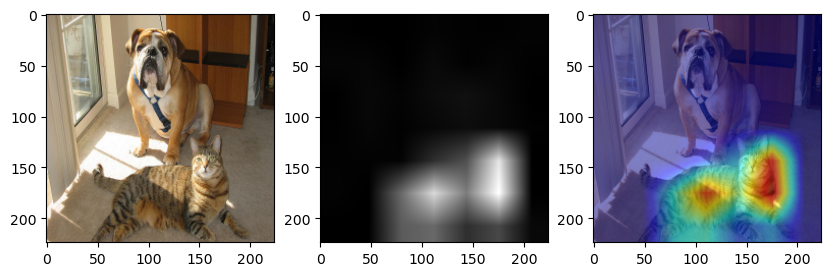

In [21]:
#XGradCAM
cam = XGradCAM(model=model, target_layers=target_layers, use_cuda=False)
targets = [ClassifierOutputTarget(category=281)]
grayscale_cam = cam(input_tensor=image_input, targets=targets)
grayscale_cam=grayscale_cam[0]
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(grayscale_cam, cmap='gray')
ax[2].imshow(cam_image)

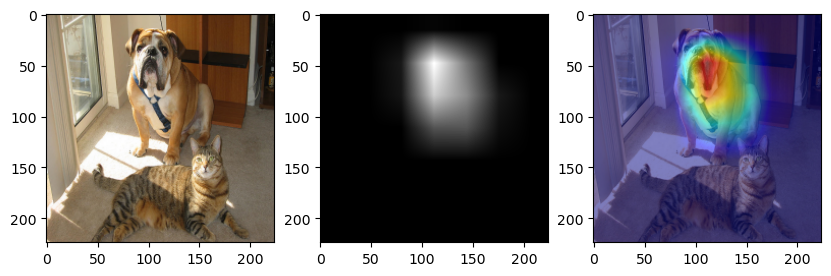

In [22]:
#EigenCAM
cam = EigenCAM(model=model, target_layers=target_layers, use_cuda=False)
targets = [ClassifierOutputTarget(category=281)]
grayscale_cam = cam(input_tensor=image_input, targets=targets)
grayscale_cam=grayscale_cam[0]
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(grayscale_cam, cmap='gray')
ax[2].imshow(cam_image)

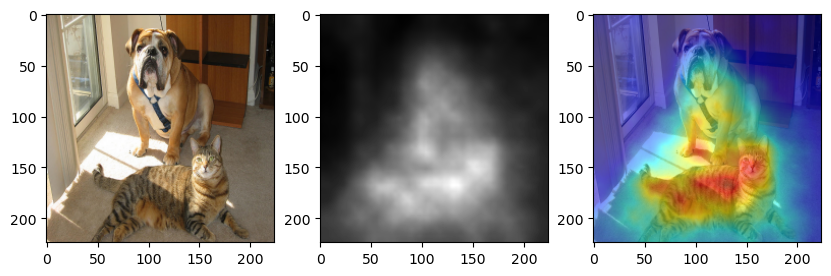

In [23]:
#FullGrad
cam = FullGrad(model=model, target_layers=target_layers, use_cuda=False)
targets = [ClassifierOutputTarget(category=281)]
grayscale_cam = cam(input_tensor=image_input, targets=targets)
grayscale_cam=grayscale_cam[0]
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(grayscale_cam, cmap='gray')
ax[2].imshow(cam_image)